<a href="https://colab.research.google.com/github/driverag83/BETO-Informe/blob/main/ENIGH2020Sonora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar paquetes iniciales

In [1]:
pip install geopandas

     |████████████████████████████████| 994 kB 8.8 MB/s 
     |████████████████████████████████| 15.4 MB 33 kB/s 
     |████████████████████████████████| 6.6 MB 37.0 MB/s 


In [2]:
import pandas as pd
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd
import json

Definir URL para bajar la información de acuerdo a la encuesta que estés buscando.

In [3]:
url = "https://www.inegi.org.mx/contenidos/programas/enigh/nc/2020/microdatos/enigh2020_ns_viviendas_csv.zip"
url2 = 'https://data.humdata.org/dataset/9721eaf0-5663-4137-b3a2-c21dc8fac15a/resource/f151b1c1-1353-4f57-bdb2-b1b1c18a1fd1/download/mex_admbnda_govmex_20210618_shp.zip'

Abrir URL y extraer archivo zip

In [4]:
resp = urlopen(url)
data = urlopen(url2)
zipfile = ZipFile(BytesIO(resp.read()))
zipfile2 = ZipFile(BytesIO(data.read()))
zipfile.extractall()
zipfile2.extractall()

Definir Dataframe leyendo archivo csv. Ojo es necesario cargar todos como tipo "string" de lo contrario tendremos problemas más adelante a la hora de buscar los estados.

In [5]:
df =pd.read_csv("viviendas.csv", dtype = str)

Esta base de datos cuenta con 64 variables y 87,754 entradas de datos para cada variable

In [6]:
df.head

<bound method NDFrame.head of          folioviv tipo_viv mat_pared  ...      upm factor procaptar
0      0100013605        2         8  ...  0000001    190         0
1      0100013606        1         8  ...  0000001    190         0
2      0100017801        1         8  ...  0000002    189         0
3      0100017802        1         8  ...  0000002    189         0
4      0100017803        1         8  ...  0000002    189         0
...           ...      ...       ...  ...      ...    ...       ...
87749  3260770714        1         8  ...  0010149    128         0
87750  3260770715        1         8  ...  0010149    128         0
87751  3260770716        1         7  ...  0010149    128         0
87752  3260770717        1         7  ...  0010149    128         0
87753  3260770718        1         7  ...  0010149    128         0

[87754 rows x 64 columns]>

Para conocer cuales son las variables de esta base de datos enlistamos los nombres de columnas

In [7]:
for col in df.columns:
  print(col)

folioviv
tipo_viv
mat_pared
mat_techos
mat_pisos
antiguedad
antigua_ne
cocina
cocina_dor
cuart_dorm
num_cuarto
disp_agua
dotac_agua
excusado
uso_compar
sanit_agua
biodigest
bano_comp
bano_excus
bano_regad
drenaje
disp_elect
focos_inca
focos_ahor
combustible
estufa_chi
eli_basura
tenencia
renta
estim_pago
pago_viv
pago_mesp
tipo_adqui
viv_usada
tipo_finan
num_dueno1
hog_dueno1
num_dueno2
hog_dueno2
escrituras
lavadero
fregadero
regadera
tinaco_azo
cisterna
pileta
calent_sol
calent_gas
medidor_luz
bomba_agua
tanque_gas
aire_acond
calefacc
tot_resid
tot_hom
tot_muj
tot_hog
ubica_geo
tam_loc
est_socio
est_dis
upm
factor
procaptar


Es importante tener a la mano el archivo de diccionario en donde podremos ver que está midiendo cada una de las variables.
Buscamos además conocer los datos para el estado de Sonora. En ese caso vamos a buscar el diccionario de las entidades federativas y utilizar la variable "folioviv" para en base a su construcción obtener en este caso los datos para el estado de Sonora. Esto se puede utilizar para los diferentes estados o hacer el análisis de forma nacional.

Creamos al nueva variable "estado", esta se crea tomando los dos primeros números de la columna para identificar la entidad federativa.

In [8]:
df['estado'] = df.ubica_geo.str[:2]

Para fines de este ejercicio buscamos los datos para el estado de Sonora. El número 26 en nuestro diccionario de entidades federativas. Creamos un nuevo dataframe solo con la información del estado de interés.

In [9]:
sonora = df.loc[df['estado'] == '26']

Podemos observar que hay 2,396 entradas para Sonora en esta base de datos

In [10]:
sonora

,folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar,estado
70881,2600002401,1,8,04,2,50,,1,2,1,4,1,1,1,2,2,2,1,0,0,1,1,4,0,5,,1,4,,800,,,4,,,01,1,,,2,1,2,1,2,2,2,2,2,1,2,2,1,2,1,1,0,1,26018,1,2,420,0008232,468,0,26
70882,2600002402,1,8,10,3,21,,1,2,3,5,1,1,1,2,1,2,1,0,0,1,1,0,7,3,,1,4,,1000,,,2,,5,01,1,02,1,1,1,1,1,2,2,1,2,2,1,2,2,1,2,3,2,1,1,26018,1,2,420,0008232,468,0,26
70883,2600002403,1,8,10,2,4,,1,2,1,2,7,,1,2,3,2,0,1,0,5,4,0,3,3,,1,4,,600,,,3,,5,01,1,,,3,1,2,2,2,2,2,2,2,2,2,2,1,2,3,2,1,1,26018,1,2,420,0008232,468,0,26
70884,2600002405,1,8,10,2,20,,1,2,2,4,1,1,1,2,1,2,1,0,0,1,1,0,6,3,,1,4,,1500,,,3,,5,01,1,,,1,1,1,1,2,2,2,2,2,1,2,2,1,2,2,2,0,1,26018,1,2,420,0008232,468,0,26
70885,2600002406,1,8,10,2,15,,1,2,2,4,1,1,1,2,1,2,1,0,0,1,1,0,6,3,,1,4,,1200,,,2,,5,01,1,,,1,1,1,1,2,2,2,2,2,1,2,2,1,2,1,1,0,1,26018,1,2,420,0008232,468,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73272,2660748901,1,8,03,3,9,,1,2,2,4,1,1,1,2,1,2,1,0,0,1,1,0,6,3,,1,4,,1000,,,3,,5,01,1,02,1,1,2,1,1,2,2,2,2,1,1,2,2,1,2,5,2,3,1,26067,4,2,441,0008542,179,0,26
73273,2660748902,1,8,03,2,30,,1,2,4,6,1,1,1,2,1,2,1,0,0,1,1,0,7,3,,1,4,,2000,,,2,,5,01,1,,,1,1,1,1,1,2,2,2,1,1,2,2,1,2,2,1,1,1,26067,4,2,441,0008542,179,0,26
73274,2660748903,1,7,03,2,50,,1,2,2,5,1,1,1,2,1,2,1,0,0,1,1,1,5,3,,1,4,,1500,,,4,,,02,1,,,1,1,1,1,1,2,2,2,1,1,2,2,2,2,4,3,1,1,26067,4,2,441,0008542,179,0,26
73275,2660748905,1,7,03,2,26,,1,2,2,4,1,1,1,2,1,2,1,0,0,1,1,0,4,3,,1,4,,5000,,,1,1,5,01,1,,,1,1,1,1,1,2,1,2,1,1,2,2,2,2,4,1,3,1,26067,4,2,441,0008542,179,0,26


Ahora para este caso nos interesa hacer un primer análisis exploratorio de los datos. Para el caso de esta base de datos ya se encuentra en un formato "tidy" el cual nos indica que cada línea significa una observación de las diferentes variables en forma de columna.

Vamos a comenzar con algo muy sencillo, ¿Qué porcentaje de las viviendas en Sonora utilizan la cocina como dormitorio?

Localizamos la variable de interés, en este caso es "cocina_dor", esta variable tiene dos posibles resultados 1 = Si, 2 = No. En este caso nos interesa saber el porcentaje de viviendas que responden Si.

Exploremos esta variable, ¿Qué tipo de variable es?

In [11]:
sonora['cocina_dor']

70881    2
70882    2
70883    2
70884    2
70885    2
        ..
73272    2
73273    2
73274    2
73275    2
73276    2
Name: cocina_dor, Length: 2396, dtype: object

Podemos ver que es una variable tipo "string", vamos a preguntar ¿Qué porcentaje de las respuestas son "1"?

In [12]:
sonora['cocina_dor'].value_counts()

2    2131
1     136
      129
Name: cocina_dor, dtype: int64

Vemos en este primer ejemplo que 294 entradas de 4,334 que contestaron la pregunta utilizan la cocina como dormitorio. Esto equivale al 6.78% del total.

Contestemos ahora una segunda pregunta, ¿Qué porcentaje de las viviendas cuentan con luz eléctrica en Sonora? Para esto ahora analicemos la variable "disp_elect" esta variable cuenta con 5 posibles valores:
1 = Luz del servicio público
2 = Luz de planta partícular
3 = Luz de panel solar
4 = Luz de otra fuente
5 = No tiene luz eléctrica

Para este caso queremos saber específicamente cuáles viviendas NO cuentan con luz eléctrica por lo que vamos a buscar un valor específico. Las entradas que tengan como valor el 5.

In [13]:
sonora.disp_elect[sonora.disp_elect == 5].count()

0

Sabemos que el total de las entradas para Sonora en esta base de datos es de 4,540 pero sabemos también por el análisis anterior que algunas veces hay no respuesta. Verifiquemos en este caso cual es el número de no respuesta para poder calcular un porcentaje de viviendas sin luz electríca.

In [14]:
sonora.disp_elect.isna().sum()

0

En este caso todos las entradas tienen una respuesta a la pregunta de si cuenta con luz eléctrica, por lo que podemos calcular nuestro porcentaje utilizando un parametro en "value_counts" que se llama "normalize" poniendo su valor a verdadero.

In [15]:
sonora.disp_elect.value_counts(normalize = True)

1    0.984975
5    0.006678
4    0.006260
3    0.001669
2    0.000417
Name: disp_elect, dtype: float64

Podemos ver que el 0.8% de la población en Sonora no tiene luz eléctrica en su casa. O que el 99.2% de la población tiene luz eléctrica de alguna fuente.

Sabemos que en Sonora se registran temperaturas muy altas durante varios meses del año. Es un lugar en donde se convierte en una primera necesidad el tener aire acondicionado. Para medir el porcentaje de viviendas con aire ancondicionado revisamos la variable "aire_acond" en dónde tenemos dos tipos de valor 1 = Si, 2 = No. Vamos a revisar qué porcentaje de las viviendas tienen aire acondicionado.

In [16]:
sonora.aire_acond.value_counts(normalize = True)

1    0.747078
2    0.252922
Name: aire_acond, dtype: float64

Buscaremos ahora el porcentaje en la ciudad de Hermosillo, para esto necesitamos el diccionario de municipios del estado y conocer como se construye la variable "ubic_geo" en la cual los primeros dos números son de la entidad federativa, los siguientes 3 números son la clave del municipio o localidad de acuerdo al  Catálogo de claves de entidades federativas, municipios y localidades.

Para Hermosillo la clave del municipio es la 030.

In [17]:
sonora['municipio'] = sonora.ubica_geo.astype(str).str[2:5]
hmo = sonora.loc[sonora['municipio'] == '030']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vamos a revisar el porcentaje de viviendas con aire acondicionado en Hermosillo y compararlo a nivel nacional.

In [18]:
hmo.aire_acond.value_counts(normalize = True)

1    0.890728
2    0.109272
Name: aire_acond, dtype: float64

In [19]:
df.aire_acond.value_counts(normalize = True)

2    0.789434
1    0.210566
Name: aire_acond, dtype: float64

In [20]:
slrc = sonora.loc[sonora['municipio'] == '055']

In [21]:
slrc.aire_acond.value_counts(normalize = True)

1    0.922449
2    0.077551
Name: aire_acond, dtype: float64

In [22]:
aacond = pd.crosstab(sonora['municipio'], sonora['aire_acond'], normalize = 'index', )

In [23]:
aacond.sort_values(by = '1', inplace = True)

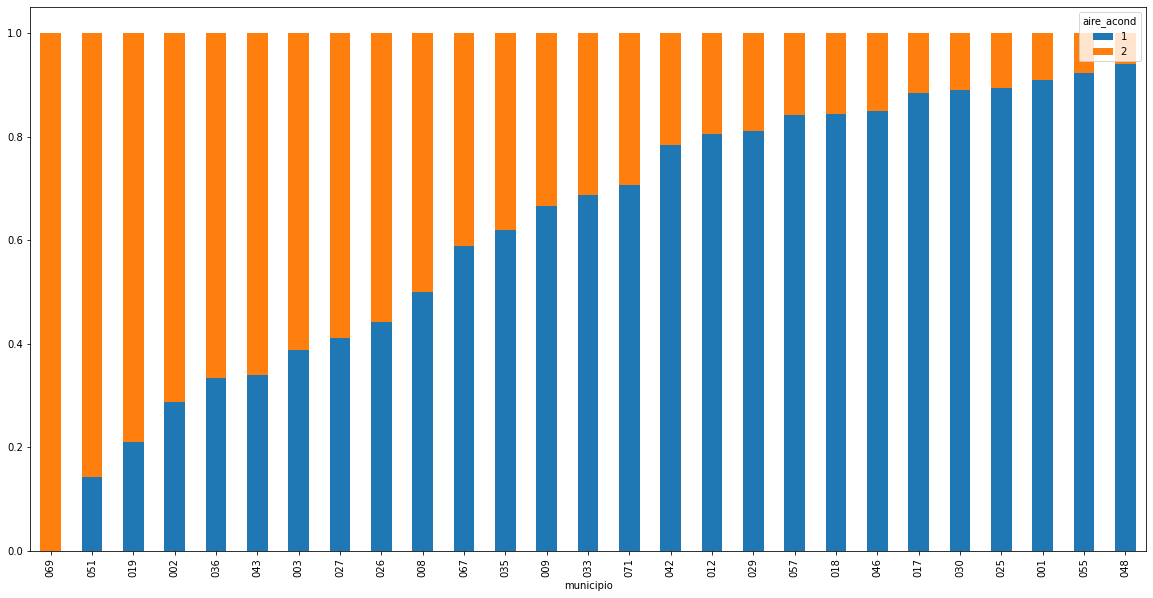

In [24]:
aacond.plot(kind = 'bar', stacked = True, figsize = (20,10))

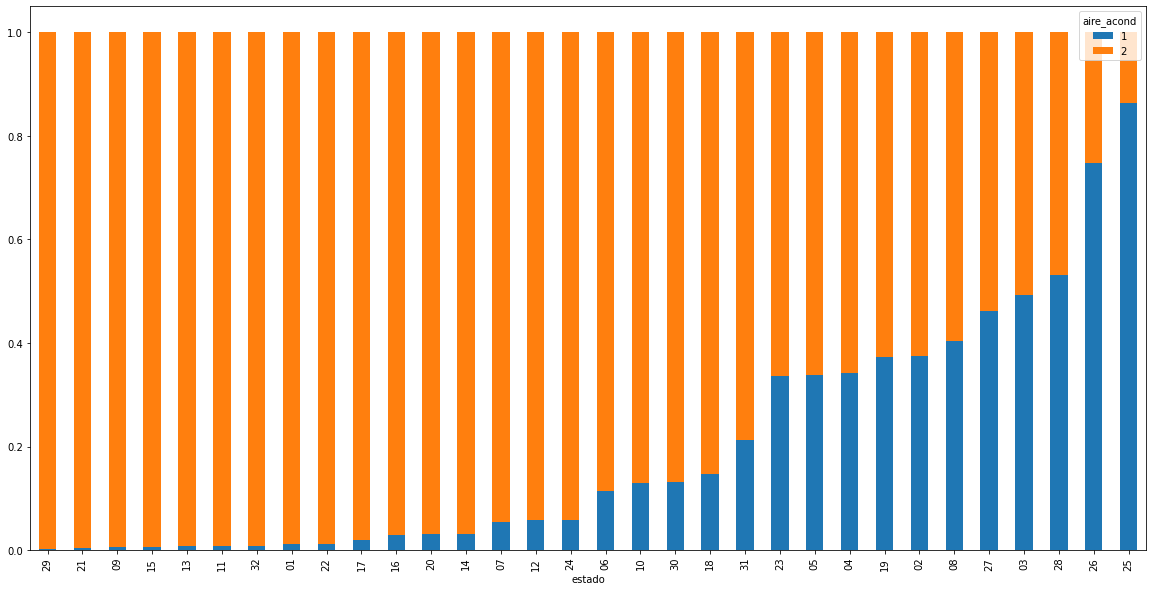

In [25]:
aanac = pd.crosstab(df['estado'], df['aire_acond'], normalize = 'index', )
aanac.sort_values(by = '1', inplace = True)
aanac.plot(kind = 'bar', stacked = True, figsize = (20,10))

In [26]:
temp2 = '/content/mex_admbnda_govmex_20210618_SHP/mex_admbnda_adm1_govmex_20210618.shp'
map_data = gpd.read_file(temp2)
map_data.head()

,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Aguascalientes,MX01,None,None,None,México,MX,2020-06-23,2021-06-18,None,3.993483,0.491151,"POLYGON ((-102.28787 22.41649, -102.28753 22.4..."
1,Baja California,MX02,None,None,None,México,MX,2020-06-23,2021-06-18,None,29.414983,6.851318,"MULTIPOLYGON (((-114.12880 28.01224, -114.1283..."
2,Baja California Sur,MX03,None,None,None,México,MX,2020-06-23,2021-06-18,None,51.783353,6.486020,"MULTIPOLYGON (((-109.91027 22.87937, -109.9102..."
3,Campeche,MX04,None,None,None,México,MX,2020-06-23,2021-06-18,None,27.833408,4.757845,"MULTIPOLYGON (((-91.55007 18.28726, -91.55142 ..."
4,Chiapas,MX07,None,None,None,México,MX,2020-06-23,2021-06-18,None,26.835058,6.150488,"MULTIPOLYGON (((-92.77034 15.15128, -92.77107 ..."


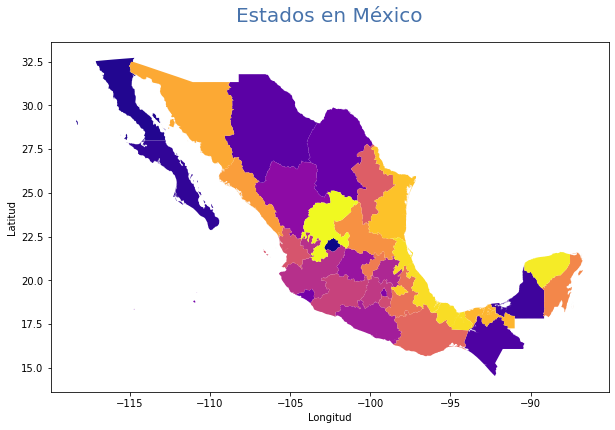

In [28]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title('Estados en México', pad = 20, fontdict = {'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
map_data.plot(cmap='plasma', ax = ax, zorder = 5)

In [29]:
urldicedo = 'https://gaia.inegi.org.mx/wscatgeo/mgee/'
dicedo = urlopen(urldicedo)
dicedo1 = json.loads(dicedo.read())
dicedo1

{'datos': [{'cve_agee': '01',
   'nom_abrev': 'Ags.',
   'nom_agee': 'Aguascalientes',
   'pob': '1425607',
   'pob_fem': '728924',
   'pob_mas': '696683',
   'viv': '386671'},
  {'cve_agee': '02',
   'nom_abrev': 'BC',
   'nom_agee': 'Baja California',
   'pob': '3769020',
   'pob_fem': '1868431',
   'pob_mas': '1900589',
   'viv': '1149563'},
  {'cve_agee': '03',
   'nom_abrev': 'BCS',
   'nom_agee': 'Baja California Sur',
   'pob': '798447',
   'pob_fem': '392568',
   'pob_mas': '405879',
   'viv': '240660'},
  {'cve_agee': '04',
   'nom_abrev': 'Camp.',
   'nom_agee': 'Campeche',
   'pob': '928363',
   'pob_fem': '471424',
   'pob_mas': '456939',
   'viv': '260824'},
  {'cve_agee': '05',
   'nom_abrev': 'Coah.',
   'nom_agee': 'Coahuila de Zaragoza',
   'pob': '3146771',
   'pob_fem': '1583102',
   'pob_mas': '1563669',
   'viv': '901249'},
  {'cve_agee': '06',
   'nom_abrev': 'Col.',
   'nom_agee': 'Colima',
   'pob': '731391',
   'pob_fem': '370769',
   'pob_mas': '360622',
   'v

In [32]:
dfdicedo = pd.json_normalize(dicedo1, record_path= ['nom_agee'])

KeyError: ignored

In [ ]:
aapivot = pd.crosstab(aageom['estado_name'], aageom['aire_acond'], normalize = 'index')